# Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip uninstall tensorflow -y
!pip install tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)


In [4]:
import numpy as np
import matplotlib

print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)

Numpy version: 2.0.2
Matplotlib version: 3.10.0


In [6]:
#importing  necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [7]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [11]:
!pip install numpy==1.23.5

In [12]:
train_path="C:\\Users\\nandi\\Downloads\\archive\\DATASET\\TRAIN"
test_path="C:\\Users\\nandi\\Downloads\\archive\\DATASET\\TEST"

In [13]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [14]:
# Visualization
import cv2
from tqdm import tqdm
import pandas as pd
from glob import glob

x_data = []
y_data = []

for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Corrected here
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [01:47<00:00, 93.36it/s] 


In [15]:
data.shape

(22564, 2)

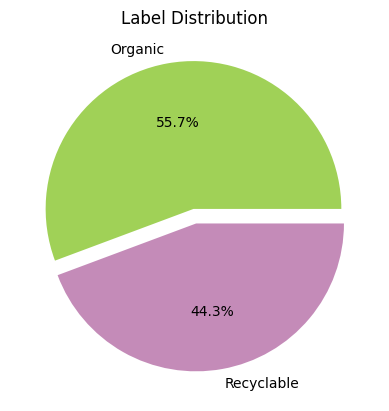

In [16]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], colors=colors, autopct='%1.1f%%', explode=[0.05,0.05])
plt.title("Label Distribution")
plt.show()

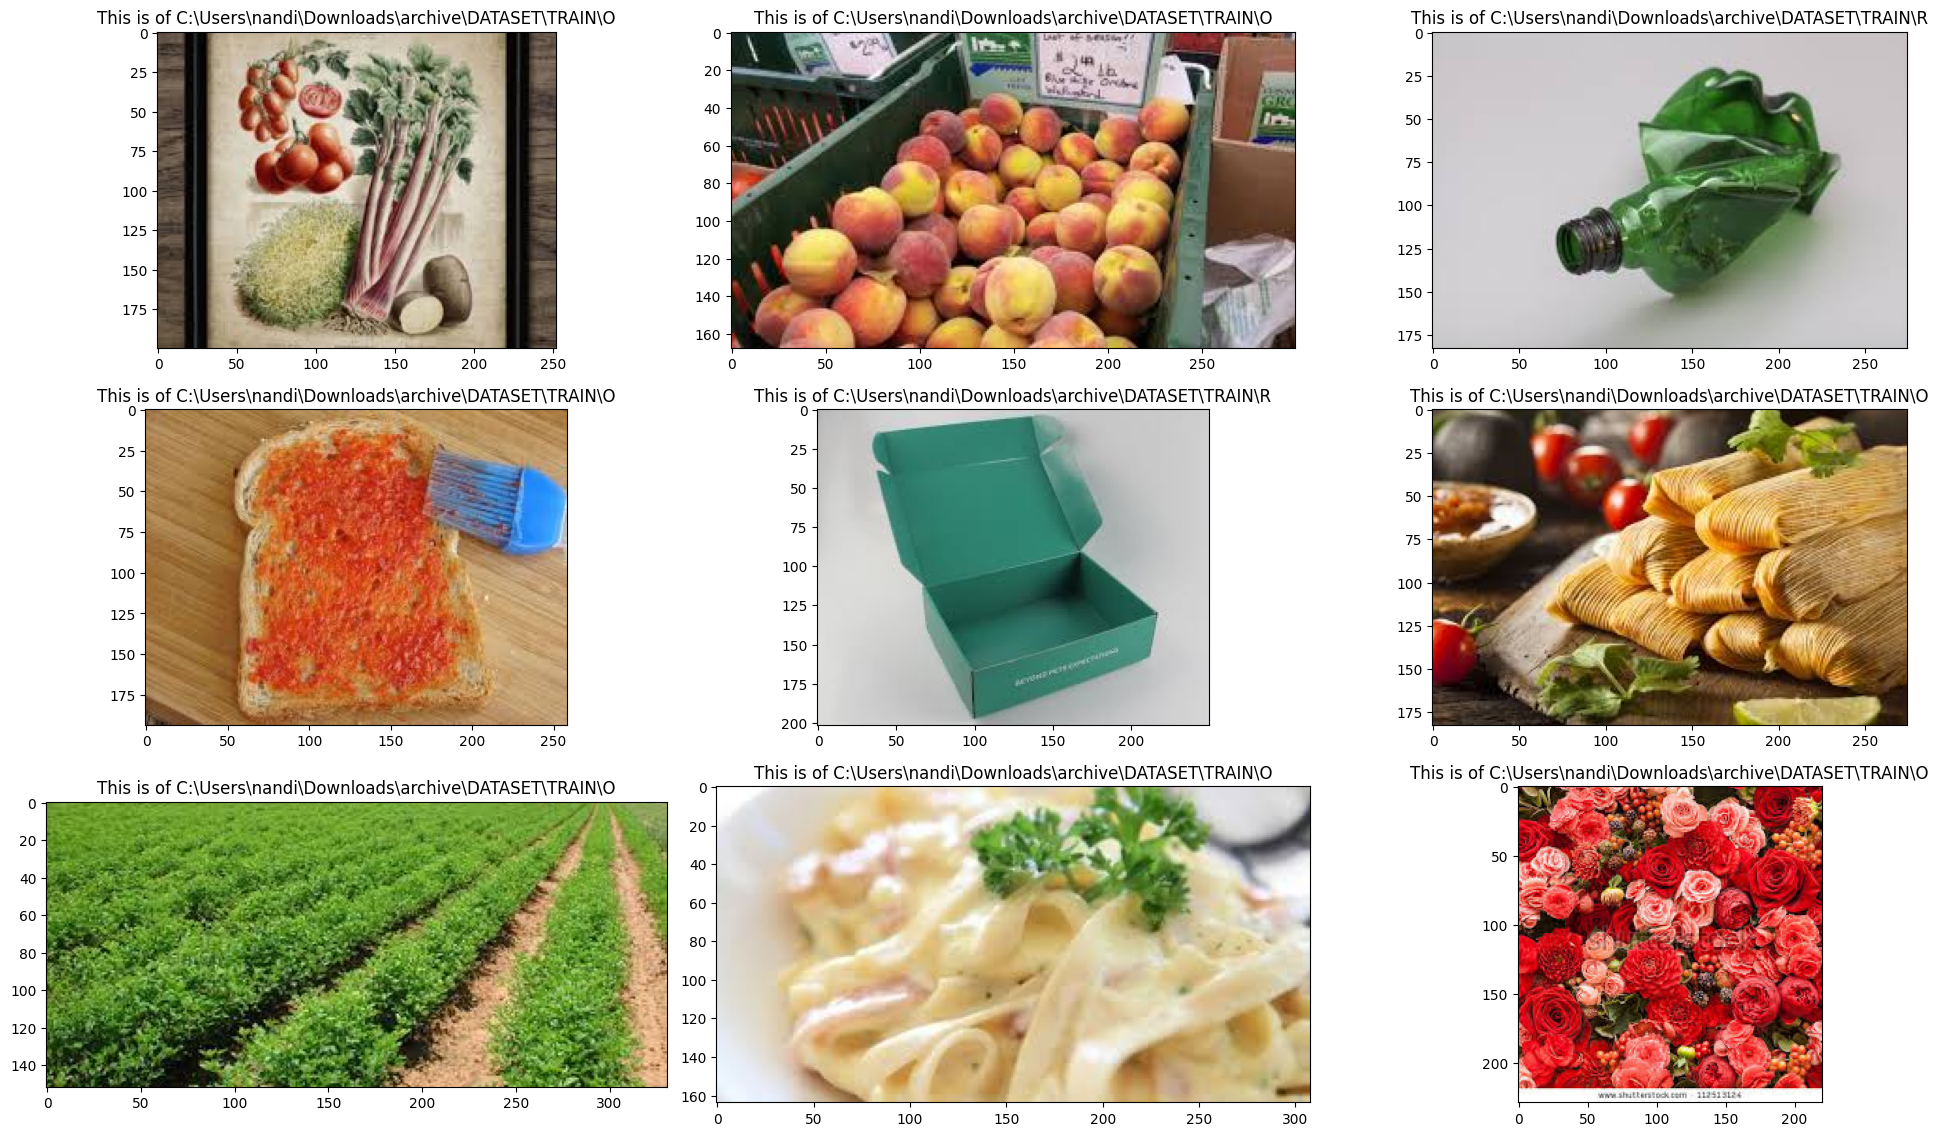

In [17]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

#  CNN-Convolution Neural Network

In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 857s 2s/step - accuracy: 0.7758 - loss: 0.5151 - val_accuracy: 0.8997 - val_loss: 0.3057
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.8503 - loss: 0.3740 - val_accuracy: 0.8532 - val_loss: 0.3604
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 886s 3s/step - accuracy: 0.8705 - loss: 0.3343 - val_accuracy: 0.8973 - val_loss: 0.2895
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - accuracy: 0.8770 - loss: 0.3033 - val_accuracy: 0.8985 - val_loss: 0.2667
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1133s 3s/step - accuracy: 0.8962 - loss: 0.2654 - val_accuracy: 0.8902 - val_loss: 0.3004
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 910s 3s/step - accuracy: 0.9177 - loss: 0.2162 - val_accuracy: 0.9061 - val_loss: 0.3049
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1093s 3s/step - accuracy: 0.9421 - loss: 0.1627 - val_accuracy: 0.9081 - val_loss: 0.3176
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 957s 3s/step - accuracy: 0.9558 - loss: 0.1195 - val_ac

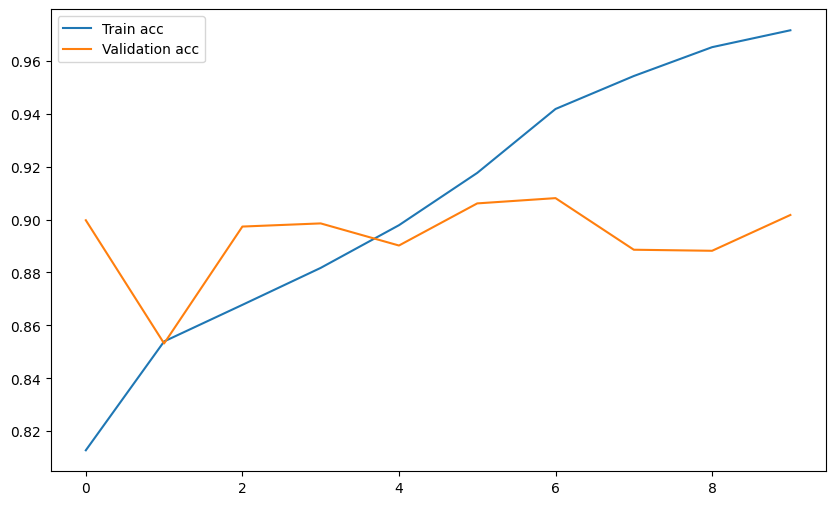

In [24]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

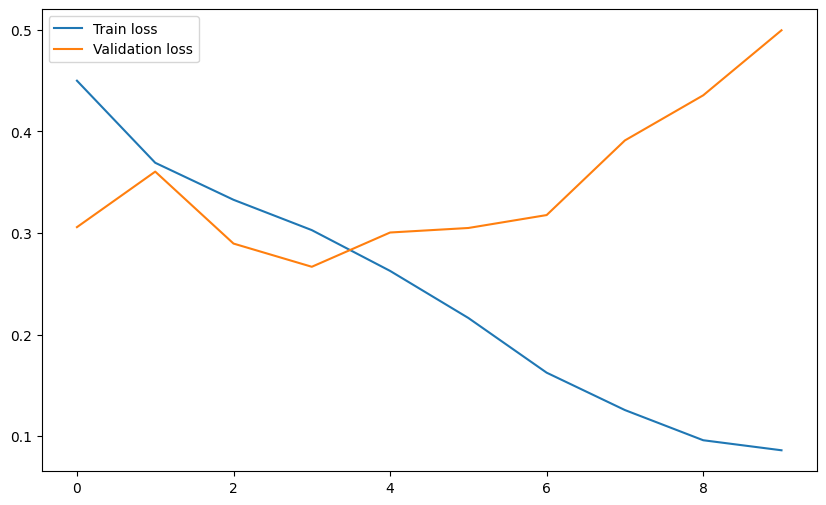

In [25]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [26]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
This image shows organic waste


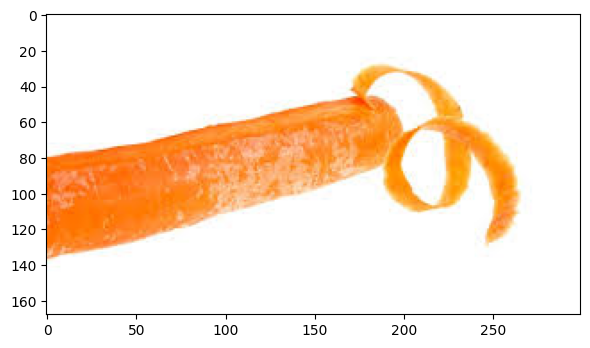

In [27]:
test_img = cv2.imread("C:\\Users\\nandi\\Downloads\\CNN MODEL\\DATASET\\TEST\\O\\O_13948.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
This image shows organic waste


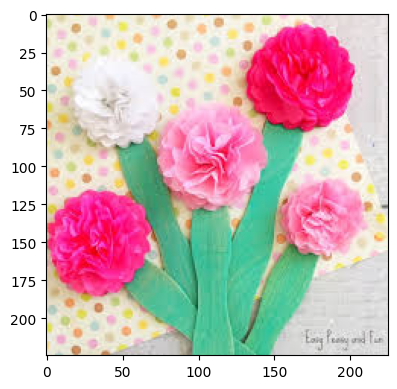

In [28]:
test_img = cv2.imread("C:\\Users\\nandi\\Downloads\\CNN MODEL\\DATASET\\DATASET\\TEST\\R\\R_11027.jpg")
predict_func(test_img)